<a href="https://colab.research.google.com/github/AYA-NASH/NN_with_TensorFlow/blob/main/03_CNN_MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multiclass Classification

### Importing data

**1- loading and understanding data**

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2023-05-12 17:53:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   154MB/s    in 3.2s    

2023-05-12 17:53:12 (154 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
extracted_data = zipfile.ZipFile("10_food_classes_all_data.zip","r")
extracted_data.extractall()
extracted_data.close()

In [3]:
# Discovering data directories:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} Images in {dirpath} directory")

There are 2 directories and 0 Images in 10_food_classes_all_data directory
There are 10 directories and 0 Images in 10_food_classes_all_data/train directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/grilled_salmon directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/pizza directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/fried_rice directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/steak directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/ice_cream directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/chicken_curry directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/chicken_wings directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/sushi directory
There are 0 directories and 750 Images in 10_food_classes_all_data/train/hamburger directory
Ther

In [4]:
# Creating list for our classes:
import pathlib
import numpy as np
train_dir_path = "10_food_classes_all_data/train/"
test_dir_path = "10_food_classes_all_data/test/"

data_dir = pathlib.Path(train_dir_path)

# class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

class_names = list(sorted([item.name for item in data_dir.glob('*')]))

In [5]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

**2- Preprocessing Data**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1 / 255.)
# Turning data into batches :
train_data = train_datagen.flow_from_directory(train_dir_path ,
                                         target_size = (224,224),
                                         batch_size = 32,
                                         class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir_path,
                                       target_size = (224,224),
                                       batch_size = 32,
                                       class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
train_images , labels = train_data.next()

train_images.shape , labels.shape

((32, 224, 224, 3), (32, 10))

###Building model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    Conv2D(10, 3, activation = "relu"),

    MaxPool2D(pool_size = 2),

    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),

    MaxPool2D(),

    Flatten(),
    Dense(10 , activation = "softmax")
])

In [9]:
model_1.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [10]:
history_1 = model_1.fit(train_data,
            epochs = 5,
            batch_size = 32,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 66s 228ms/step - loss: 2.2245 - accuracy: 0.1681 - val_loss: 2.0666 - val_accuracy: 0.2552
Epoch 2/5
235/235 [==============================] - 50s 215ms/step - loss: 1.8728 - accuracy: 0.3469 - val_loss: 2.0053 - val_accuracy: 0.2876
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.2882 - accuracy: 0.5707 - val_loss: 2.3770 - val_accuracy: 0.2840
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 0.5608 - accuracy: 0.8201 - val_loss: 3.2117 - val_accuracy: 0.2516
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.1674 - accuracy: 0.9500 - val_loss: 4.9648 - val_accuracy: 0.2468


**Evaluating model:**

In [11]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 4.9648 - accuracy: 0.2468


[4.964791774749756, 0.2468000054359436]

**Helper Function to Visualize model's loss**

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss))

  # plotting loss
  plt.plot(epochs, loss, label = "Training Loss")
  plt.plot(epochs, val_loss, label = "Validation loss")  
  plt.legend();

  # plotting Accuracy:
  plt.figure()
  plt.plot(epochs, accuracy, label = "Training Accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")  
  plt.legend();

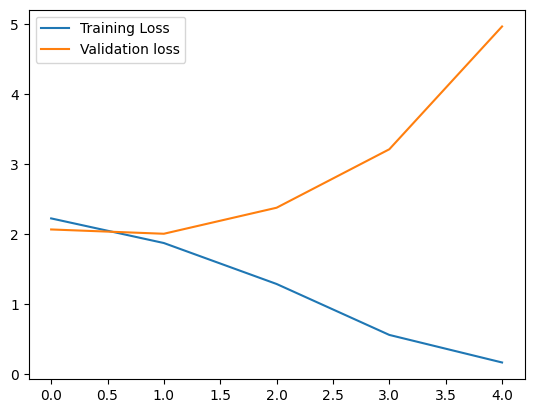

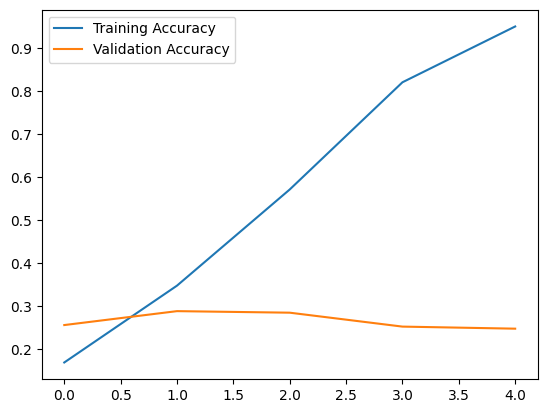

In [14]:
plot_loss_curves(history_1)

###Modifying The model:

1- decrease the convlayers

In [15]:
model_2 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
   
    MaxPool2D(pool_size = 2),

    Conv2D(10, 3, activation = "relu"),
   
    MaxPool2D(),

    Flatten(),
    Dense(10 , activation = "softmax")
])

model_2.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
            epochs = 5,
            batch_size = 32,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 200ms/step - loss: 2.1635 - accuracy: 0.2225 - val_loss: 1.9789 - val_accuracy: 0.3080
Epoch 2/5
235/235 [==============================] - 48s 202ms/step - loss: 1.7868 - accuracy: 0.3933 - val_loss: 1.9854 - val_accuracy: 0.2996
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.3363 - accuracy: 0.5665 - val_loss: 1.9951 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 47s 200ms/step - loss: 0.8373 - accuracy: 0.7497 - val_loss: 2.3255 - val_accuracy: 0.3012
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.4296 - accuracy: 0.8852 - val_loss: 2.7215 - val_accuracy: 0.2916


In [16]:
model_2.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 2.7215 - accuracy: 0.2916


[2.721519947052002, 0.29159998893737793]

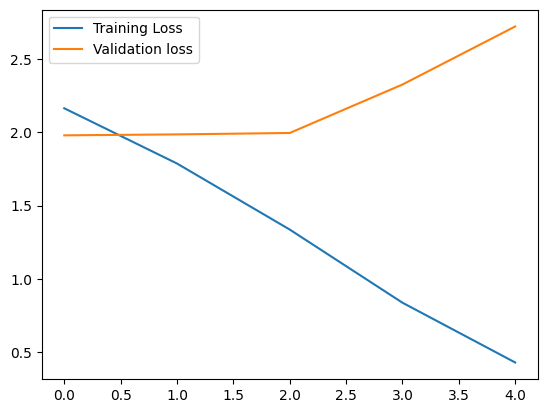

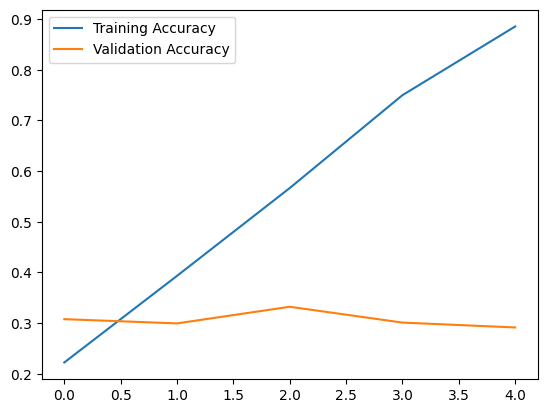

In [17]:
plot_loss_curves(history_2)

2- Applying data Augmentation:


In [18]:
# data augmentation applyed only on training data:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

augmented_train_data = train_datagen_augmented.flow_from_directory(train_dir_path,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [19]:
# Use model_1 on augmented data:
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(augmented_train_data,
            epochs = 5,
            batch_size = 32,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 119s 496ms/step - loss: 2.2019 - accuracy: 0.1775 - val_loss: 2.0719 - val_accuracy: 0.2536
Epoch 2/5
235/235 [==============================] - 117s 498ms/step - loss: 2.0760 - accuracy: 0.2567 - val_loss: 1.9716 - val_accuracy: 0.2976
Epoch 3/5
235/235 [==============================] - 116s 492ms/step - loss: 2.0199 - accuracy: 0.2821 - val_loss: 1.8459 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 125s 533ms/step - loss: 1.9704 - accuracy: 0.3211 - val_loss: 1.8800 - val_accuracy: 0.3520
Epoch 5/5
235/235 [==============================] - 117s 496ms/step - loss: 1.9448 - accuracy: 0.3284 - val_loss: 1.7714 - val_accuracy: 0.4024


**Helper Functions to load and plot the predicted output from Custom input image**

In [20]:
# Define a helper function to load and preprocess the data:
def  load_and_prep_image(filename , img_shape = 224 ):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img /= 255.

  return img

In [21]:
# Creating a function to use a model and a custom image to visualize the prediction:
def pred_and_plot(model, filename, classes):
  # use the file name to extract the image as a tensor to work with:
  img = load_and_prep_image(filename)
  # img = tf.expand_dims(img , axis = 0)
  # run the model on img:
  pred = model.predict(tf.expand_dims(img , axis = 0))
 # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # plot the img with its predicted title:
  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False);